In [8]:
import pandas as pd

columns = []
for tx in range(20):
    for rx in range(20):
        columns.append(f'Tx{tx+1} Rx{rx+1}')


df = pd.DataFrame(columns=columns)
df

,Tx1 Rx1,Tx1 Rx2,Tx1 Rx3,Tx1 Rx4,Tx1 Rx5,Tx1 Rx6,Tx1 Rx7,Tx1 Rx8,Tx1 Rx9,Tx1 Rx10,...,Tx20 Rx11,Tx20 Rx12,Tx20 Rx13,Tx20 Rx14,Tx20 Rx15,Tx20 Rx16,Tx20 Rx17,Tx20 Rx18,Tx20 Rx19,Tx20 Rx20


In [17]:
import os
import numpy as np

from functions import *

parameters = {
        'sample_rate': 1e6,  # Hz
        'num_samples': 1000,  # number of samples per call to rx()
        'center_freq': 2.3e9,  # Hz 2.4e9
        'bandwidth': 1e4,  # Hz
        'transmitter_attenuation': 0,  # dB
        'receiver_gain': 30,  # dB

        'size': 1.5,
        'num_iter': 100,
        # 'device_indices': [1, 6, 11, 16],
        'device_indices': [x+1 for x in range(20)]

    }

result = {}

for dir in os.scandir('result'):
    if dir.is_dir():
        dataset = np.load(dir.path + "\dataset.npy")
        dataset = np.absolute(dataset.mean(axis=3)).mean(axis=0)
        for tx in range(dataset.shape[0]):
            for rx in range(dataset.shape[1]):
                dataset[tx][rx] = actual_power(dataset[tx][rx], parameters['receiver_gain'])

        result[dir.name[:5]] = dataset
        # dataset = dataset.reshape(400,-1).squeeze()
        # df.loc[dir.name[:5]] = dataset.tolist()

result

{'09Sep': array([[-18.60091032, -22.38894162, -29.79966489, -29.25647316,
         -39.70437255, -34.3059224 , -27.93960116, -28.03402317,
         -29.35534985, -26.80388271, -27.74042023, -40.89563156,
         -26.96204351, -25.51922129, -23.81484382, -35.8384633 ,
         -36.14995015, -37.3427893 , -24.98977775, -18.9631928 ],
        [-25.38718354, -18.47698803, -32.40891994, -32.65598676,
         -35.69910328, -33.01244185, -28.03086852, -28.22979231,
         -28.02919973, -32.0832272 , -27.53624364, -28.80930236,
         -24.63813503, -25.96595582, -25.89986802, -26.59398821,
         -29.2356785 , -29.81483956, -17.98380002, -16.10281662],
        [-29.65256795, -34.82440489, -20.10894699, -30.37047879,
         -37.5083458 , -30.79356548, -27.14247435, -27.93377189,
         -24.6763263 , -28.76232113, -26.20676623, -24.83187877,
         -25.47204305, -26.30973487, -24.63041125, -27.54560902,
         -31.41251042, -25.60365821, -21.25634347, -22.26159594],
        [-31.

<AxesSubplot:>

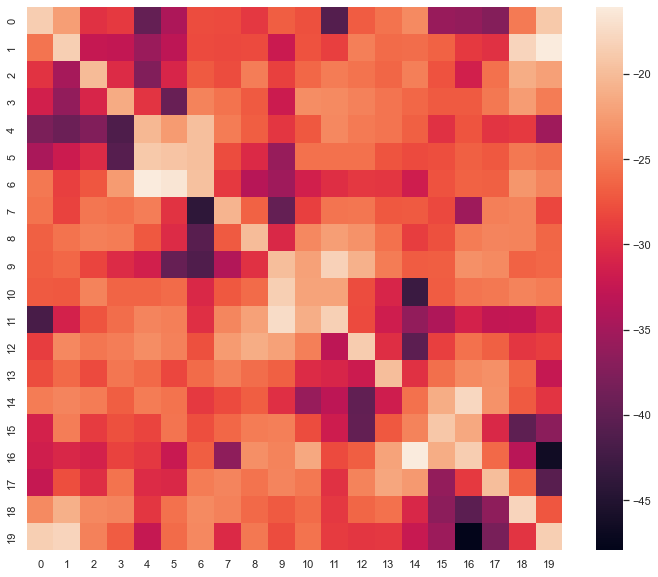

In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(result['09Sep'])

In [15]:
df = df.round(2)
# df.to_excel("result\\result.xlsx")

df

In [5]:
import time 
time.strftime('%d%b%H%M%S', time.localtime())

'22Sep150002'